In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape


(891, 12)

In [5]:
data['Name']=data['Name'].astype('string')

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Cabin']=data['Cabin'].ffill()

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

In [9]:
data.dropna(inplace=True)

CountPlot

<Axes: xlabel='Sex', ylabel='count'>

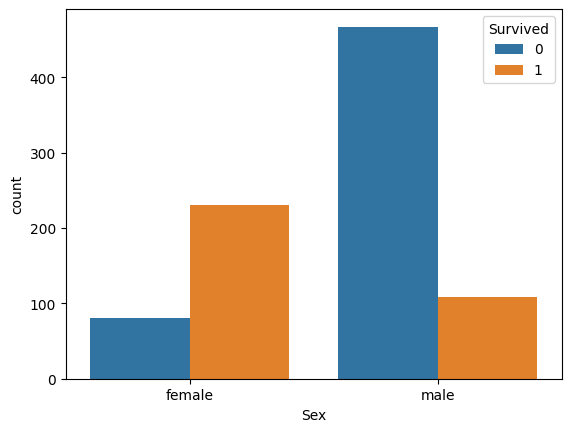

In [10]:
sns.countplot(data=data,x='Sex',hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

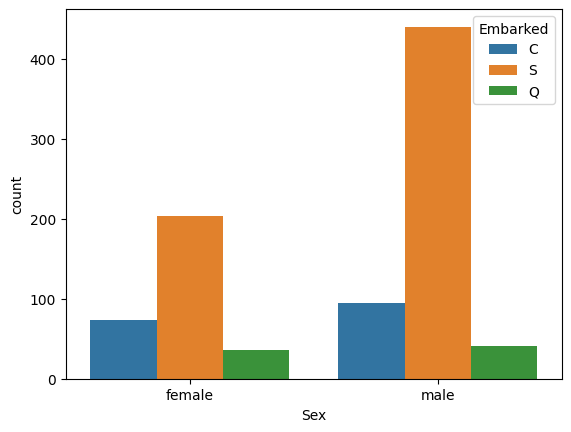

In [11]:
sns.countplot(data=data,x='Sex',hue='Embarked')

Text(0, 0.5, 'Number of Passengers')

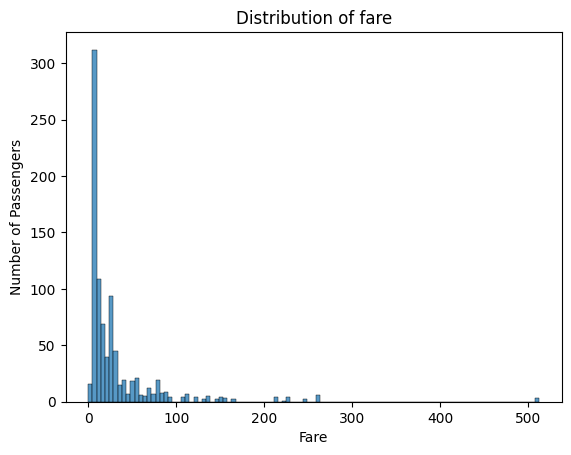

In [12]:
sns.histplot(data=data,x='Fare')
plt.title("Distribution of fare")
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

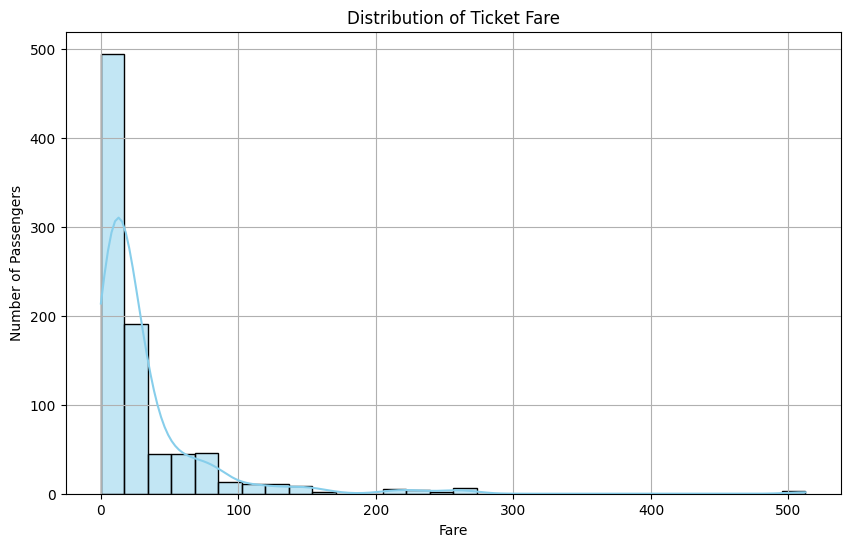

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ticket Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [14]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<Axes: xlabel='Age', ylabel='count'>

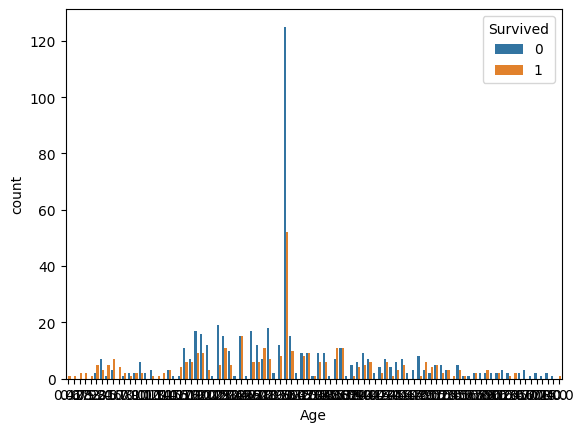

In [15]:
sns.countplot(data=data,x='Age',hue='Survived')

In [16]:
new_data=data[['Age','Survived']]

In [17]:
new_data.head()

,Age,Survived
1,38.000000,1
2,26.000000,1
3,35.000000,1
4,35.000000,0
5,29.699118,0


In [18]:
new_data['Age'].max()

np.float64(80.0)

In [19]:
df=pd.DataFrame(new_data)

bins=[0,10,20,30,40,50,60,100]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60+']
df['Age_Group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)
survived_data=df.groupby(['Age_Group','Survived']).size().unstack(fill_value=0)

C:\Users\abhin\AppData\Local\Temp\ipykernel_217068\202379029.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_data=df.groupby(['Age_Group','Survived']).size().unstack(fill_value=0)


In [20]:
survived_data.head()

Survived,0,1
Age_Group,,
0-10,24,38
10-20,61,41
20-30,267,129
30-40,94,72
40-50,55,34


<Axes: xlabel='Age_Group', ylabel='count'>

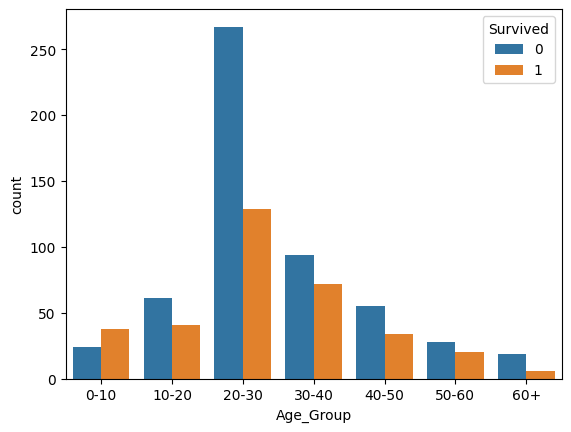

In [21]:
sns.countplot(data=df,x='Age_Group',hue='Survived')